# 02. 분류

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import torch.nn as nn # 신경망(neural network) 모듈
import torch.optim as optim # optimizer를 담고 있는 모듈
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np

## 2-1. 로지스틱 회귀
## 이진 분류
- multivariate_normal
- vstack

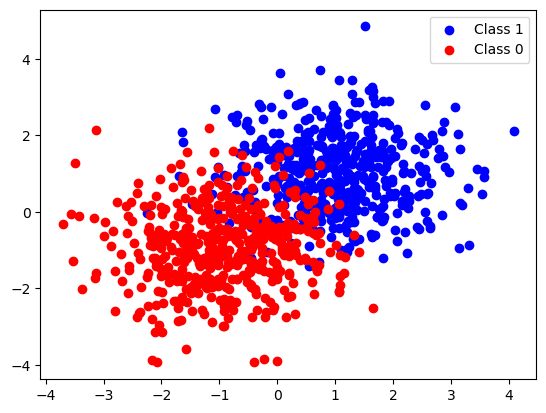

Epoch [99 / 1000, Loss:  0.3352]
Epoch [199 / 1000, Loss:  0.2974]
Epoch [299 / 1000, Loss:  0.2740]
Epoch [399 / 1000, Loss:  0.2581]
Epoch [499 / 1000, Loss:  0.2466]
Epoch [599 / 1000, Loss:  0.2380]
Epoch [699 / 1000, Loss:  0.2313]
Epoch [799 / 1000, Loss:  0.2259]
Epoch [899 / 1000, Loss:  0.2215]
Epoch [999 / 1000, Loss:  0.2179]


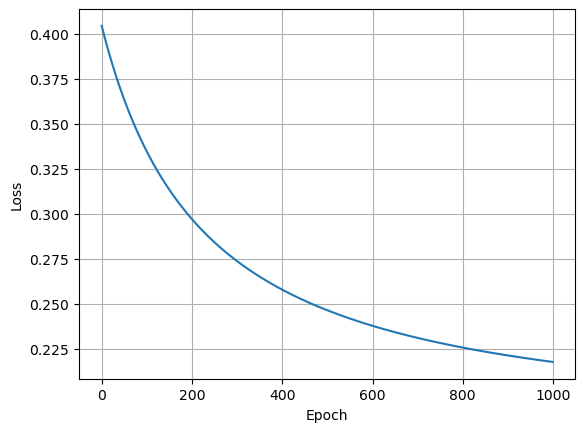

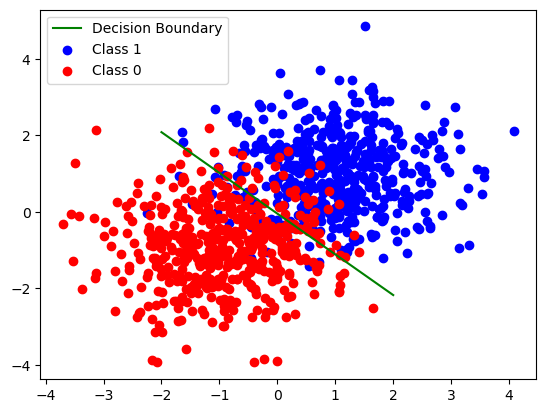

In [13]:
# 1. 데이터 입출력 정의
np.random.seed(42) # 시드 고정(변경해도 바뀌지 않게)
num_samples = 1000 # 입력값 1000개

mean_1 = np.array([1., 1.])
cov_1 = np.array([[1,0], [0,1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples // 2)

mean_2 = np.array([-1., -1.])
cov_2 = np.array([[1,0], [0,1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples // 2)

# 데이터 확인
plt.scatter(data_1[:, 0], data_1[:, 1], color="b", label="Class 1")
plt.scatter(data_2[:, 0], data_2[:, 1], color="r", label="Class 0")
plt.legend()
plt.show()


# 데이터 정의
data = np.vstack((data_1, data_2))
labels = np.ones(num_samples) # 앞 데이터 500개 label = 1
labels[num_samples // 2:] = 0 # 뒤 데이터 500개 label = 0

# 텐서로 변환
data = torch.from_numpy(data).float()
labels = torch.from_numpy(labels).float()
labels = labels.view(-1, 1)
num_samples, num_features = data.shape

# 2. 모델 정의
class LogistcRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

model = LogistcRegression(2, 1)

# 3. 손실함수 정의
criterion = nn.BCELoss()

# 4. 가중치 업데이트(학습)
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
epochs = 1000
losses = []

for epoch in range(epochs):
    inputs = Variable(data)
    targets = Variable(labels)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch} / {epochs}, Loss: {loss.item(): .4f}]")

# 5. 시각화
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# 결정 경계 그리기
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
x_plot = np.array([-2, 2])
y_plot = (-b -w[0][0] * x_plot) / w[0][1] # 결정 경계의 함수

plt.plot(x_plot, y_plot, color="g", label="Decision Boundary")
plt.scatter(data_1[:, 0], data_1[:, 1], color="b", label="Class 1")
plt.scatter(data_2[:, 0], data_2[:, 1], color="r", label="Class 0")
plt.legend()
plt.show()



## 2-2. FashionMNIST 신경망(다항 분류)
`from torch.utils.data import DataLoader` : 데이터를 배치 단위로 효율적으로 다루기 위한 도구(DataLoader 클래스)
`from torchvision import datasets, transforms` : PyTorch의 torchvision 라이브러리에서 데이터셋(datasets) 과 데이터 변환(transforms) 기능을 불러오는 코드
- 딥러닝 모델의 학습과 테스트를 위해 사용되는 데이터셋
- FashionMNIST는 Zalando에서 제공하는 데이터셋으로, 의류와 액세서리와 관련된 이미지로 구성되어 있음


[Epoch] 1/10
[batch:  100], Loss: 1.652224 ( 6336/60000)
[batch:  200], Loss: 1.461325 (12736/60000)
[batch:  300], Loss: 1.292519 (19136/60000)
[batch:  400], Loss: 1.078457 (25536/60000)
[batch:  500], Loss: 1.051239 (31936/60000)
[batch:  600], Loss: 1.074788 (38336/60000)
[batch:  700], Loss: 0.971187 (44736/60000)
[batch:  800], Loss: 1.098733 (51136/60000)
[batch:  900], Loss: 1.004812 (57536/60000)
Test - Accuracy:  76.7%, Avg_loss0.949713
[Epoch] 2/10
[batch:  100], Loss: 1.072556 ( 6336/60000)
[batch:  200], Loss: 0.958199 (12736/60000)
[batch:  300], Loss: 0.901719 (19136/60000)
[batch:  400], Loss: 0.797756 (25536/60000)
[batch:  500], Loss: 0.753847 (31936/60000)
[batch:  600], Loss: 0.811255 (38336/60000)
[batch:  700], Loss: 0.780574 (44736/60000)
[batch:  800], Loss: 0.727953 (51136/60000)
[batch:  900], Loss: 0.794689 (57536/60000)
Test - Accuracy:  80.0%, Avg_loss0.736452
[Epoch] 3/10
[batch:  100], Loss: 0.626903 ( 6336/60000)
[batch:  200], Loss: 0.717973 (12736/600

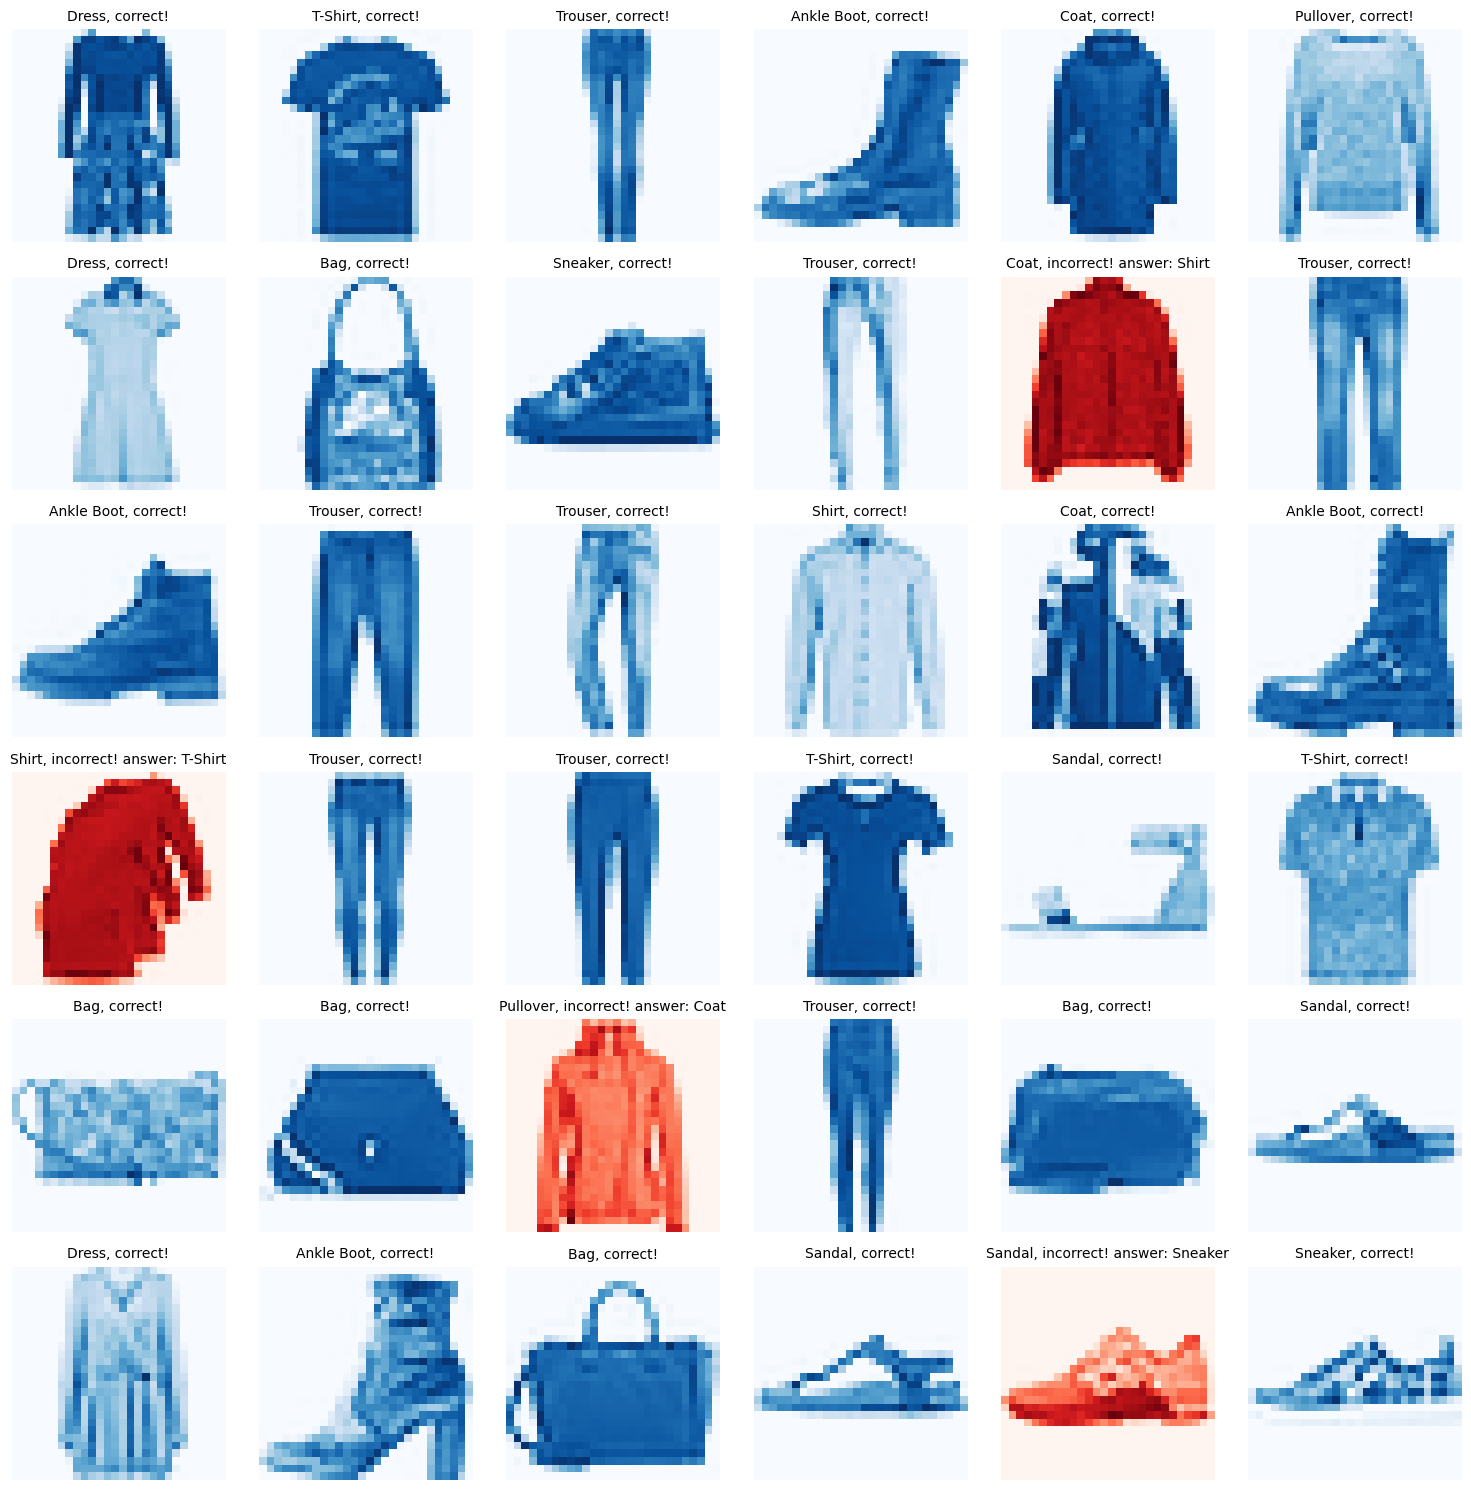

In [4]:
# 1. 데이터 입출력 정의
transform = transforms.ToTensor() # 이미지 데이터를 tensor로 변환

# 트레이닝 데이터 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

# 테스트 데이터 정의
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# 데이터 로더 정의
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# 2. 모델 정의
class MultiClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        out = self.model(x)
        return out
    
model = MultiClassificationModel()

# 3. 손실함수 정의
criterion = nn.CrossEntropyLoss()

# 4. 가중치 업데이트(학습)
optimizer = optim.SGD(model.parameters(), lr=0.001)
epochs = 10

# 학습 루프
def train_loop(dataloader, model, criterion, optimizer):
    model.train() # 학습 모드
    size = len(dataloader.dataset)
    running_loss = 0.

    # x는 데이터, y는 정답
    for batch, (x, y) in enumerate(dataloader):
        optimizer.zero_grad() # 초기화
        outputs = model(x) # 순전파
        loss = criterion(outputs, y) # 손실계산
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        running_loss += loss.item() * x.size(0) # 전체 loss 값을 구하려면 loss에 batch size를 곱

        if (batch + 1) % 100 == 0:
            current = batch * len(x)
            # 네자리확보, > : 오른쪽 정렬
            print(f"[batch: {batch+1: 4d}], Loss: {loss.item():>7f} ({current:>5d}/{size:>5d})")
    
    epoch_loss = running_loss / size
    return epoch_loss

# 테스트 루프
def test_loop(dataloader, model, criterion):
    model.eval() # 평가 모드
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0.
    correct = 0

    with torch.no_grad():
        for x, y in dataloader:
            outputs = model(x)
            loss = criterion(outputs, y)
            test_loss += loss.item()
            correct += (outputs.argmax(1) == y).sum().item()

    avg_loss = test_loss / num_batches
    accuracy = correct / size
    print(f"Test - Accuracy: {100*accuracy:>5.1f}%, Avg_loss{avg_loss:>8f}")
    return avg_loss, accuracy

# 학습 실행
print()
for epoch in range(epochs):
    print(f"[Epoch] {epoch+1}/{epochs}")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    val_loss, val_acc = test_loop(test_dataloader, model, criterion)

print()
print("완료")

# 5. 시각화
label_tags = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"
}

rows, columns = 6, 6
fig = plt.figure(figsize=(15,15))
model.eval()

for i in range(1, rows * columns + 1):
    data_idx = np.random.randint(len(test_data))
    img_tensor, true_label = test_data[data_idx]

    with torch.no_grad():
        x = img_tensor.unsqueeze(0) # (1,28,28) → (1,1,28,28) 변형
        output = model(x)
        pred_idx = output.argmax(1).item()

    pred_class = label_tags[pred_idx] # 예측한 태그
    true_class = label_tags[true_label] # 정답 태그

    is_correct = (pred_idx == int(true_label))
    title = f"{pred_class}, correct!" if is_correct else f"{pred_class}, incorrect! answer: {true_class}"
    cmap = "Blues" if is_correct else "Reds"

    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img_tensor.squeeze(0).numpy(), cmap=cmap)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()
